In [1]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url = "https://raw.githubusercontent.com/Dandk013/MindSpaceCapstone/main/EmotionDataset.csv"
df = pd.read_csv(url)
df.head()

In [ ]:
df['emotion'] = df['emotion'].map({
    'Happy' : 0,
    'Sad' : 1
})

df.head()

,text,emotion
0,dipeluk enak nih,0
1,masih dongg wkkwkwtar klo gk semangat gk bisa ...,0
2,semangat dan bertambah kuatlah kalian frp_nats...,0
3,jangan lupa sarapann semangat buat hari inii a...,0
4,aw ikut seneng semangat ya kuliahnya!,0


In [ ]:
#Lower case if there is any
df['text'] = df['text'].apply(lambda x: x.lower())
df.head()

,text,emotion
0,dipeluk enak nih,0
1,masih dongg wkkwkwtar klo gk semangat gk bisa ...,0
2,semangat dan bertambah kuatlah kalian frp_nats...,0
3,jangan lupa sarapann semangat buat hari inii a...,0
4,aw ikut seneng semangat ya kuliahnya!,0


In [ ]:
#Import NLTK for stop words
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from string import punctuation

def remove_stopwords_and_punctuations(text):
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [token for token in tokens if token not in stop_words and token not in punctuation]
    return ' '.join(filtered_tokens)

df['text'] = df['text'].apply(lambda x: remove_stopwords_and_punctuations(x))
df.head()

,text,emotion
0,dipeluk enak nih,0
1,dongg wkkwkwtar klo gk semangat gk bucinin bebep2,0
2,semangat bertambah kuatlah frp_natsud_ frp_luc...,0
3,lupa sarapann semangat inii ayang semoga harim...,0
4,aw seneng semangat ya kuliahnya,0


In [ ]:
#Shuffle
from sklearn.utils import shuffle

df = shuffle(df)
df.head()

,text,emotion
1891,bahagia kecewa ..,1
1062,kaya kasih apapun orang jarang banget kejadian...,0
3203,membahagiakan biasku foto elf returnofthelittl...,0
158,sgt enak,0
3927,icip2 :9 sebelahnya sate gang lele mahal bakmi...,1


In [ ]:
#Train-Test Split
from sklearn.model_selection import train_test_split

labels = df['emotion']
data = df['text']

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.33)

x_train.head()

2830    salah banget udah sepagian play hourglass yaam...
2836    yah asik main nexian messenger nxm sempet chat...
3360    berbulan-bulan tertunda krn akreditasi rumah s...
1304                                               kecewa
984     selamat pagi sender alec sesuai banget kriteri...
Name: text, dtype: object

In [ ]:
#Tokenization & sequencing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(x_train)

sequence_train = tokenizer.texts_to_sequences(x_train)
sequence_test = tokenizer.texts_to_sequences(x_test)

In [ ]:
V = len(tokenizer.index_word)
print("Tokenized %s Unique Tokens" %V)

Tokenized 11783 Unique Tokens


In [ ]:
#Padding
data_train = pad_sequences(sequence_train)

T = data_train.shape[1]

data_test = pad_sequences(sequence_test, maxlen=T)

In [ ]:
# Define the vocabulary size
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
#Build Model
from tensorflow.keras.layers import Input, Conv1D, Embedding, MaxPooling1D, GlobalMaxPooling1D, Add, Dense, Dropout, LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

# Define the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 100, input_length=T))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)))
model.add(tf.keras.layers.Dense(500, kernel_regularizer=regularizers.l2(0.01)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
r = model.fit(
    data_train,
    y_train,
    validation_data=(data_test, y_test),
    epochs = 10
)

Epoch 1/10
90/90 [==============================] - 86s 767ms/step - loss: 1.0257 - accuracy: 0.7322 - val_loss: 0.8026 - val_accuracy: 0.8137
Epoch 2/10
90/90 [==============================] - 65s 721ms/step - loss: 0.2188 - accuracy: 0.9544 - val_loss: 0.7295 - val_accuracy: 0.5046
Epoch 3/10
90/90 [==============================] - 60s 671ms/step - loss: 0.0883 - accuracy: 0.9788 - val_loss: 0.4833 - val_accuracy: 0.8038
Epoch 4/10
90/90 [==============================] - 64s 712ms/step - loss: 0.0428 - accuracy: 0.9892 - val_loss: 0.4451 - val_accuracy: 0.8095
Epoch 5/10
90/90 [==============================] - 61s 678ms/step - loss: 0.0244 - accuracy: 0.9930 - val_loss: 0.4850 - val_accuracy: 0.7939
Epoch 6/10
90/90 [==============================] - 65s 730ms/step - loss: 0.0217 - accuracy: 0.9937 - val_loss: 0.5550 - val_accuracy: 0.7918
Epoch 7/10
90/90 [==============================] - 60s 670ms/step - loss: 0.0217 - accuracy: 0.9934 - val_loss: 0.7450 - val_accuracy: 0.7960

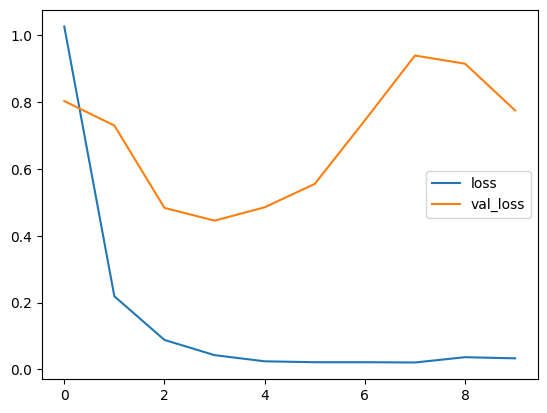

In [ ]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

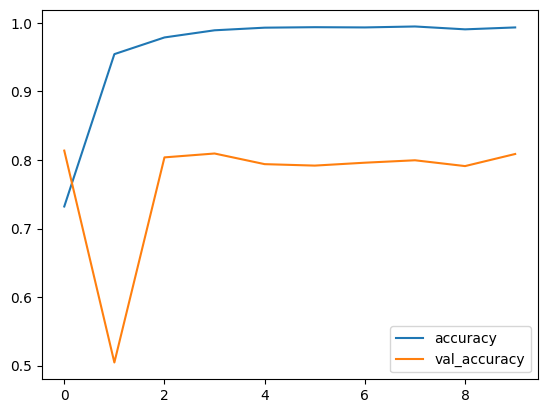

In [ ]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [ ]:
model.evaluate(
    data_test,
    y_test
)

45/45 [==============================] - 6s 138ms/step - loss: 0.7745 - accuracy: 0.8088


[0.7744792699813843, 0.8087508678436279]

In [ ]:
from tensorflow.keras.models import save_model

save_model(model, 'emotion-recoginition.h5')

<ipython-input-22-8195e12f01a0>:3: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, 'emotion-recoginition.h5')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 259, 100)          1178400   
                                                                 
 bidirectional (Bidirection  (None, 259, 128)          84480     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 500)               32500     
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 batch_normalization (Batch  (None, 500)               2